In [2]:
import pandas as pd
import openpyxl

# Load the dataset into a Pandas DataFrame
data = pd.read_excel(r"C:\Users\GARVITA\OneDrive\Desktop\datasheetformetastatic_RGCIRC.xlsx", engine="openpyxl")
data= data.drop('Height', axis=1)
data= data.drop('Weight', axis=1)
data= data.drop('BMI', axis=1)
data.dropna(how='all', inplace=True)
# Replace missing values with the median of the column
data['Family history'] = data['Family history'].fillna("No")
data['BP'] = data['BP'].fillna("No")
data['Survival after 3 years'] = data['Survival after 3 years'].fillna("No")
data['Bones'] = data['Bones'].fillna("No")
data['Nodes'] = data['Nodes'].fillna("No")
data['Viscera'] = data['Viscera'].fillna("No")
data['Gleason Score']=data['Gleason Score'].fillna(0)
data['Nadir PSA']=data['Nadir PSA'].fillna(0)
data['PSA doubling time< 6 months']= data['PSA doubling time< 6 months'].fillna("No")
data['ECOG']=data['ECOG'].fillna(data['ECOG'].mean())
data['PSA levels']=data['PSA levels'].fillna(data['PSA levels'].mean())
dummies = pd.get_dummies(data[['Family history', 'Histology', 'Bones', 'Nodes', 'Viscera','M', 'N',
                               'PSA doubling time< 6 months', 'BP', 'Survival after 3 years']])
data = pd.concat([data, dummies], axis=1)
data= data.drop(['Family history', 'Histology', 'N', 'M', 'Bones', 'Nodes',
       'Viscera','PSA doubling time< 6 months', 'BP', 'Survival after 3 years',
       'Family history_No',
       'Histology_Acinar AdencoarciNoma',
       'Histology_Acinar Adenocarcinoma ',
       'Histology_Adenocarcinoma ',
       'Histology_acinar Adenocarcinoma', 'M_M1', 'Bones_No', 'Nodes_No', 'Viscera_No',
       'PSA doubling time< 6 months_No','BP_No',
       'Survival after 3 years_No', 'Survival after 3 years_No  '], axis=1)

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import pandas as pd
X = data.drop(['Survival after 3 years_Yes'], axis=1)
y = data['Survival after 3 years_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# OVERSAMPLING using smote
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_train, y_train=smt.fit_resample(X_train, y_train)
#X_train_sm, y_train_sm=smt.fit_resample(X_train, y_train)

Accuracy: 0.7804878048780488


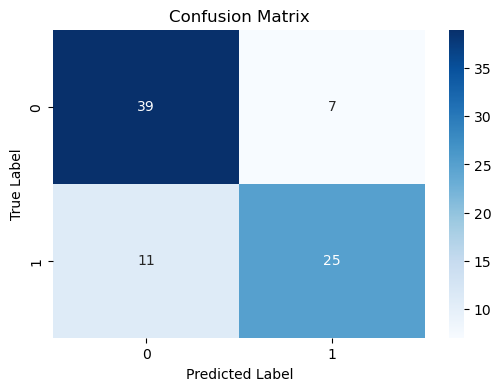

In [5]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.7560975609756098


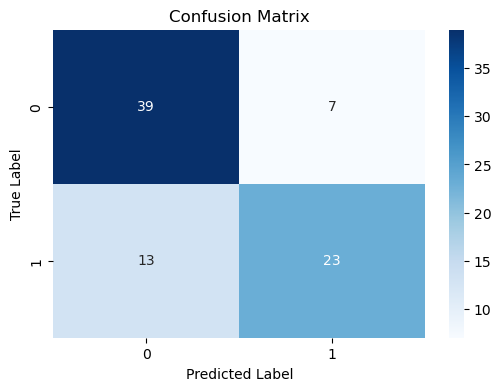

In [5]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()